# Using Directory of Kennith lay CEO and director, who went to prison. We are doing it this way to speed up our code, as otherwise it may take a long time to run.

In [11]:
import os
#Using Directory of Kennith lay CEO and director, who went to prison. We are doing it this way to speed up our code, as otherwise it may take a long time to run.
rootdir = "/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/"
#os.walk() function to loop over the directories.This will print the directory, sub directory and length of files
for directory, subdirectory, filenames in  os.walk(rootdir):
    print(directory, subdirectory, len(filenames))
 

/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/ ['_sent', 'all_documents', 'business', 'calendar', 'compaq', 'deleted_items', 'discussion_threads', 'elizabeth', 'enron', 'family', 'inbox', 'notes_inbox', 'sec_panel', 'sent', 'sent_items'] 0
/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/_sent [] 261
/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/all_documents [] 1127
/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/business [] 2
/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/calendar [] 8
/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/compaq [] 1
/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/deleted_items [] 1126
/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/discussion_threads [] 910
/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/elizabeth [] 35
/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/enron [

# Analysing the Directory of kennith lay and checking top 10 most emails he has sent and received

In [6]:
import os
from collections import Counter
# parse the email
from email.parser import Parser
rootdir = "/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/"

def email_analyse(inputfile, to_email_list, from_email_list, email_body):
    with open(inputfile, "r",errors='ignore') as f:
        data = f.read()

    email = Parser().parsestr(data)
    #Cleaning code to remove spaces tabs etc
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")

        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

    from_email_list.append(email['from'])

    email_body.append(email.get_payload())

#Creating list to store to ,from body of email
to_email_list = []
from_email_list = []
email_body = []

for directory, subdirectory, filenames in  os.walk(rootdir):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_body )
# Printing top 10 email 
print("\nTo email adresses: \n")
print(Counter(to_email_list).most_common(10))

print("\nFrom email adresses: \n")
print(Counter(from_email_list).most_common(10))

with open("email_body.txt", "w") as f:
    for email_bod in email_body:
        if email_bod:
            f.write(email_bod)
            f.write("\n")


To email adresses: 

[('kenneth.lay@enron.com', 2039), ('klay@enron.com', 1903), ('jeff.skilling@enron.com', 372), ('mark.koenig@enron.com', 313), ('greg.whalley@enron.com', 304), ('mark.frevert@enron.com', 304), ('steven.kean@enron.com', 278), ('mike.mcconnell@enron.com', 261), ('jeffrey.mcmahon@enron.com', 251), ('john.sherriff@enron.com', 244)]

From email adresses: 

[('rosalee.fleming@enron.com', 856), ('brown_mary_jo@lilly.com', 82), ('leonardo.pacheco@enron.com', 78), ('savont@email.msn.com', 66), ('tori.wells@enron.com', 58), ('elizabeth.davis@compaq.com', 50), ('no.address@enron.com', 47), ('katherine.brown@enron.com', 47), ('mrslinda@lplpi.com', 40), ('lizard_ar@yahoo.com', 36)]


# Storing the body of email of Kennith lay inbox and checking top 100 frequent words and creating word cloud for same

In [54]:
#Importing NLTK to find top words
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Defining function to remove punctuations
import re
def punctuation(elem):
    pattern=re.compile('\W+')
    return  re.match(pattern,elem)

with open("email_body.txt", "r") as f:
    data = f.read()


words= word_tokenize(data)
useful_words = [word  for word in words if word not in stopwords.words('English')]
newList1=[elem1 for elem1 in useful_words if not punctuation(elem1) ]
frequency = nltk.FreqDist(newList1)

print(frequency.most_common(100))



[('Enron', 14536), ('I', 13970), ('The', 7138), ('company', 5943), ('employees', 5234), ('energy', 4437), ('To', 4020), ('made', 3994), ('would', 3843), ('California', 3734), ('Lay', 3468), ('consumers', 3441), ('Ken', 3402), ('http', 3213), ('Please', 3200), ('We', 3051), ('million', 2866), ('stock', 2670), ('Mr.', 2621), ('pay', 2491), ('funds', 2393), ('retirement', 2329), ('bills', 2298), ('bankruptcy', 2297), ('millions', 2294), ('donate', 2260), ('declared', 2250), ("n't", 2217), ('year', 2201), ('As', 2199), ('New', 2190), ('ENRON', 2182), ('help', 2154), ('information', 2095), ('know', 2086), ('last', 2060), ('time', 2039), ('well', 1998), ('If', 1933), ('us', 1911), ('many', 1899), ('please', 1869), ('new', 1821), ('provide', 1818), ('This', 1789), ('Subject', 1783), ('2000', 1763), ('like', 1749), ('business', 1706), ('meeting', 1701), ('Houston', 1658), ('York', 1558), ('2001', 1544), ('keep', 1521), ('ECT', 1519), ('also', 1516), ('efforts', 1504), ('And', 1488), ('In', 147

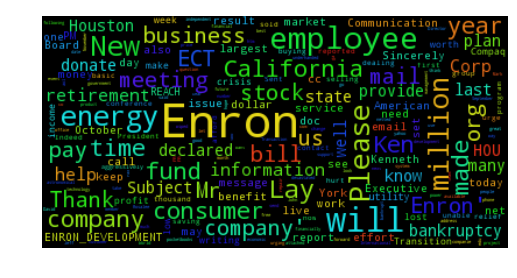

In [153]:
#Using Matlpotlib and word cloud to create word cloud
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
d="/Users/shivamgoel/Desktop/Python/midterm"
text = open(path.join(d, 'email_body.txt')).read()
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Analysis 2
# Social Network Analysis of CEO main culprit of Enron Scandal

In [3]:
#Importing package
import os
from collections import Counter

from email.parser import Parser
rootdir = "/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/lay-k/"

def email_analyse(inputfile, to_email_list, from_email_list, email_body):
    with open(inputfile, "r",errors='ignore') as f:
        data = f.read()

    email = Parser().parsestr(data)
    
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")

        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

    from_email_list.append(email['from'])

    email_body.append(email.get_payload())


to_email_list = []
from_email_list = []
email_body = []

for directory, subdirectory, filenames in  os.walk(rootdir):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_body )

print("\nTo email adresses: \n")
print(Counter(to_email_list).most_common(10))

print("\nFrom email adresses: \n")
print(Counter(from_email_list).most_common(10))



To email adresses: 

[('kenneth.lay@enron.com', 2039), ('klay@enron.com', 1903), ('jeff.skilling@enron.com', 372), ('mark.koenig@enron.com', 313), ('mark.frevert@enron.com', 304), ('greg.whalley@enron.com', 304), ('steven.kean@enron.com', 278), ('mike.mcconnell@enron.com', 261), ('jeffrey.mcmahon@enron.com', 251), ('john.sherriff@enron.com', 244)]

From email adresses: 

[('rosalee.fleming@enron.com', 856), ('brown_mary_jo@lilly.com', 82), ('leonardo.pacheco@enron.com', 78), ('savont@email.msn.com', 66), ('tori.wells@enron.com', 58), ('elizabeth.davis@compaq.com', 50), ('katherine.brown@enron.com', 47), ('no.address@enron.com', 47), ('mrslinda@lplpi.com', 40), ('lizard_ar@yahoo.com', 36)]


In [4]:
#Imorting graph
import networkx as nx
G = nx.Graph()
#Creating Nodes
sender = "kenneth.lay@enron.com"
for recipient in from_email_list:
    G.add_edge(sender, recipient)# Creating edges
    nx.write_gexf(G, 'enron.gexf')#Writing it to a file
    

In [5]:
#Sorting to get most important person of interest
node_degree = nx.degree(G).items()
sorted_degrees = sorted(node_degree, key=lambda tup: tup[1])
poi = [email for (email, degree) in sorted_degrees[-10:]]
poi

['mary.shelton@ncmail.net',
 'dan41867@attbi.com',
 'wuelf@aol.com',
 'mark.metts@enron.com',
 'sarah_rimer@hotmail.com',
 'christian@ncgia.ucsb.edu',
 'ashok.mehta@enron.com',
 'lora.sullivan@enron.com',
 'michael.horning@enron.com',
 'kenneth.lay@enron.com']

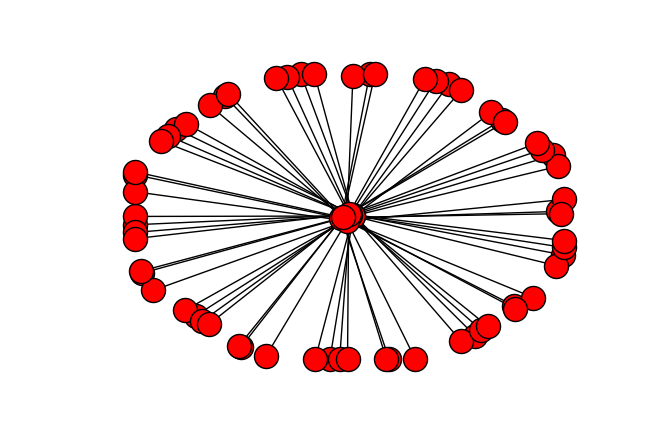

In [146]:
#Visualizing graph
#nx.draw_spectral(G, with_labels=True)
sub_G = G.subgraph(poi)
nx.draw(sub_G)
#nx.draw_networkx_labels(G,poi,font_size=16,font_color='r')
#G=nx.dodecahedral_graph()
#labels=nx.draw_networkx_labels(sub_G,pos=nx.spring_layout(sub_G))
#nx.relabel.relabel_nodes(sub_G,sub_G.no, copy=True) 
plt.show()

sub_G.edges()

# Analysis 3


# Checking who sends most emails and who receives most email in ernon dataset. Printing the top 20  users Email id and plotting a graph of it

In [15]:
from collections import Counter

from email.parser import Parser
rootdir = "/Users/shivamgoel/Desktop/Python/midterm/data/enron/maildir/"


def email_analyse(inputfile, to_email_list, from_email_list, email_body):
    with open(inputfile, "r",errors='ignore') as f:
        data = f.read()

    email = Parser().parsestr(data)
    
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")

        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

    from_email_list.append(email['from'])


to_email_list = []
from_email_list = []
email_body = []

for directory, subdirectory, filenames in  os.walk(rootdir):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_body )

print("\nTo email adresses: \n")
print(Counter(to_email_list).most_common(20))

print("\nFrom email adresses: \n")
print(Counter(from_email_list).most_common(20))


To email adresses: 

[('richard.shapiro@enron.com', 15149), ('jeff.dasovich@enron.com', 14207), ('tana.jones@enron.com', 12828), ('steven.kean@enron.com', 12754), ('sara.shackleton@enron.com', 11433), ('james.steffes@enron.com', 10347), ('mark.taylor@enron.com', 9787), ('pete.davis@enron.com', 9281), ('susan.mara@enron.com', 9064), ('paul.kaufman@enron.com', 8522), ('louise.kitchen@enron.com', 8305), ('tim.belden@enron.com', 7991), ('sally.beck@enron.com', 7315), ('john.lavorato@enron.com', 7259), ('gerald.nemec@enron.com', 6766), ('harry.kingerski@enron.com', 6562), ('kay.mann@enron.com', 6489), ('karen.denne@enron.com', 6259), ('joe.hartsoe@enron.com', 6191), ('sandra.mccubbin@enron.com', 6114)]

From email adresses: 

[('kay.mann@enron.com', 16735), ('vince.kaminski@enron.com', 14368), ('jeff.dasovich@enron.com', 11411), ('pete.davis@enron.com', 9149), ('chris.germany@enron.com', 8801), ('sara.shackleton@enron.com', 8777), ('enron.announcements@enron.com', 8587), ('tana.jones@enron

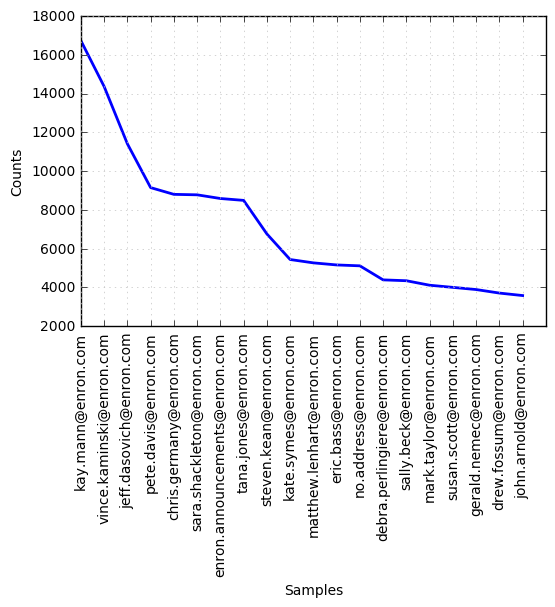

In [16]:
# finding trend in from mail
from nltk.book import *
fdist1 = FreqDist(from_email_list)

fdist1.plot(20)

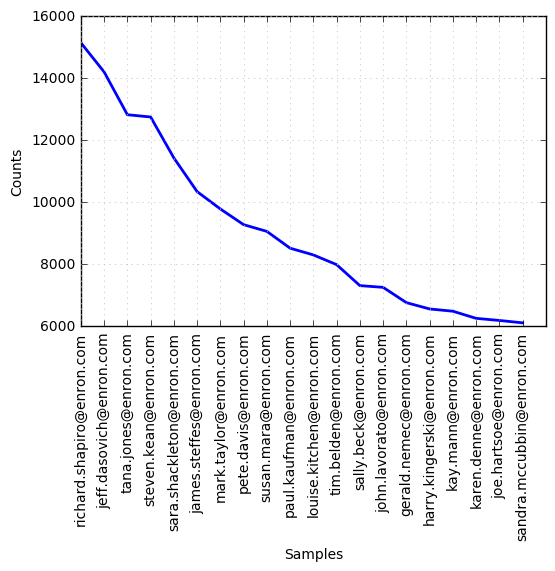

In [14]:
# finding trend in to mail
fdist1 = FreqDist(to_email_list)

fdist1.plot(20)